In [1]:
import pandas as pd
from surprise import Dataset, SVD, Reader, NormalPredictor, accuracy
from surprise.model_selection import cross_validate, KFold, GridSearchCV

In [2]:
ratings_df = pd.read_csv('../data/ratings.csv')
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [4]:
ratings_df['movieId'].nunique()

9724

In [5]:
ratings_df['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

(array([ 1370.,  2811.,  1791.,  7551.,  5550., 20047., 13136., 26818.,
         8551., 13211.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

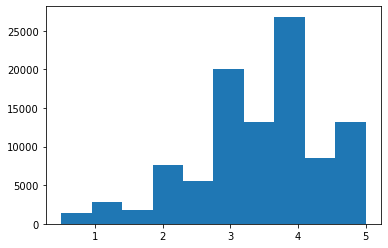

In [6]:
import matplotlib.pyplot as plot

plot.hist(ratings_df['rating'])

In [7]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings_df[["userId", "movieId", "rating"]], reader)

cross_validate(NormalPredictor(), data, cv=2)

{'test_rmse': array([1.42448205, 1.42460799]),
 'test_mae': array([1.13722396, 1.14067437]),
 'fit_time': (0.04313302040100098, 0.04558610916137695),
 'test_time': (0.23219609260559082, 0.22452902793884277)}

In [8]:
#kf = KFold(n_splits=5)
#svd = SVD()

#for train, test in kf.split(data):
    svd.fit(train)
    preds = svd.test(test)

    accuracy.rmse(preds, verbose=True)

RMSE: 0.8790
RMSE: 0.8703
RMSE: 0.8713
RMSE: 0.8728
RMSE: 0.8780


In [9]:
#grid = {"n_epochs": [5, 10, 20, 25], "lr_all": [0.002, 0.005, .008], "reg_all": [0.2, 0.4, 0.6]}
#gs = GridSearchCV(SVD, grid, measures=["rmse", "mae"], cv=3)

#gs.fit(data)

# best RMSE score
#print(gs.best_score["rmse"])

# combination of parameters that gave the best RMSE score
#print(gs.best_params["rmse"])

In [10]:
#svd.predict(456, 2000)

In [11]:
#svd.predict(601, 2000)

In [12]:
movies_df = pd.read_csv('../data/movies.csv')
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [13]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [14]:
movies_df.loc[movies_df['movieId'] == 2000]

,movieId,title,genres
1475,2000,Lethal Weapon (1987),Action|Comedy|Crime|Drama


In [15]:
#from surprise import SVD
#from surprise.model_selection import cross_validate
#from sklearn.model_selection import train_test_split

#svd = SVD()

#X = ratings_df.drop('rating', axis=1)
#y = ratings_df['rating']

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [16]:
import surprise
from surprise.prediction_algorithms import *
import pandas as pd
import numpy as np
import datetime as dt

1. Drop nulls
2. join/concatenate all the csv's together, based on different Id types
3. OneHotEncode() across all genres to create features/separation??
4. Can we work with the tag data at all? Some NLP??
5. Do we need to work with the ordinal ratings in a particular way??

In [17]:
#train1, test1 = surprise.model_selection.train_test_split(data, random_state=42)

In [18]:
#svd1 = SVD()
#svd.fit(train1)
#preds1 = svd.test(test1)

#accuracy.rmse(preds, verbose=True)

In [107]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV
from surprise.prediction_algorithms import SVD

In [108]:
train_full = data.build_full_trainset()

In [109]:
svd_best = SVD(n_epochs = 25, lr_all = 0.008, reg_all = 0.2)

In [110]:
model = svd_best

THIS WILL CHANGE!

In [111]:
model.fit(train_full)

Build a list of all the movies each customer has watched

In [113]:
ratings_df['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
406      20
595      20
569      20
431      20
442      20
Name: userId, Length: 610, dtype: int64

In [114]:
watched_df = ratings_df.set_index('userId')
watched_df.drop(columns=['rating', 'timestamp'], inplace=True)
watched_df

,movieId
userId,
1,1
1,3
1,6
1,47
1,50
...,...
610,166534
610,168248
610,168250


In [115]:
watched_df.to_csv('../data/watched_df.csv')

In [152]:
user = input('UserId: ')

UserId:  474


In [122]:
watched_list = list(watched_df.loc[user, 'movieId'])
len(watched_list)

2108

In [124]:
options_list = movies_df.copy()
options_list = movies_df.set_index('movieId')
options_list

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [125]:
options_list.drop(watched_list, inplace=True)
options_list.reset_index(inplace=True)
options_list.head()

,movieId,title,genres
0,3,Grumpier Old Men (1995),Comedy|Romance
1,4,Waiting to Exhale (1995),Comedy|Drama|Romance
2,8,Tom and Huck (1995),Adventure|Children
3,9,Sudden Death (1995),Action
4,10,GoldenEye (1995),Action|Adventure|Thriller


In [126]:
len(movies_df) - len(options_list)

2108

In [127]:
options_list['pred_rating'] = options_list['movieId'].apply(lambda i: model.predict(user, i).est)
options_list.sort_values(by='pred_rating', ascending=False, inplace=True)
options_list.head()

,movieId,title,genres,pred_rating
7510,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,4.317660
6193,106642,"Day of the Doctor, The (2013)",Adventure|Drama|Sci-Fi,4.256768
1514,3266,Man Bites Dog (C'est arrivé près de chez vous)...,Comedy|Crime|Drama|Thriller,4.221589
3696,27156,Neon Genesis Evangelion: The End of Evangelion...,Action|Animation|Drama|Fantasy|Sci-Fi,4.218199
2873,6460,"Trial, The (Procès, Le) (1962)",Drama,4.200873


In [128]:
top_5_recs = options_list.drop(columns=['genres'])

In [129]:
top_5_recs = top_5_recs.rename(columns={'title': 'Recommendations', 'genres': 'Genres', 'pred_rating': 'Rating Potential'})
top_5_recs = top_5_recs.set_index('movieId')
top_5_recs.head()

,Recommendations,Rating Potential
movieId,,
177593,"Three Billboards Outside Ebbing, Missouri (2017)",4.317660
106642,"Day of the Doctor, The (2013)",4.256768
3266,Man Bites Dog (C'est arrivé près de chez vous)...,4.221589
27156,Neon Genesis Evangelion: The End of Evangelion...,4.218199
6460,"Trial, The (Procès, Le) (1962)",4.200873


In [138]:
def movie_recommender():
    
    user = input('userId: ')
    
    watched_list = list(watched_df.loc[user, 'movieId'])
    options_list = movies_df.copy()
    options_list = movies_df.set_index('movieId')
    options_list.drop(watched_list, inplace=True)
    options_list.reset_index(inplace=True)
    options_list['pred_rating'] = options_list['movieId'].apply(lambda i: model.predict(user, i).est)
    options_list.sort_values(by='pred_rating', ascending=False, inplace=True)
    return options_list.head()

In [145]:
movie_recommender()

userId:  406


,movieId,title,genres,pred_rating
2567,3451,Guess Who's Coming to Dinner (1967),Drama,4.348257
9598,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,4.317660
877,1178,Paths of Glory (1957),Drama|War,4.276387
835,1104,"Streetcar Named Desire, A (1951)",Drama,4.264993
8281,106642,"Day of the Doctor, The (2013)",Adventure|Drama|Sci-Fi,4.256768


In [146]:
movie_recommender()

userId:  610


,movieId,title,genres,pred_rating
2390,3451,Guess Who's Coming to Dinner (1967),Drama,4.348257
8316,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,4.317660
810,1178,Paths of Glory (1957),Drama|War,4.276387
772,1104,"Streetcar Named Desire, A (1951)",Drama,4.264993
7179,106642,"Day of the Doctor, The (2013)",Adventure|Drama|Sci-Fi,4.256768


In [149]:
movie_recommender()

userId:  599


,movieId,title,genres,pred_rating
1539,3451,Guess Who's Coming to Dinner (1967),Drama,4.348257
7149,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,4.317660
5983,106642,"Day of the Doctor, The (2013)",Adventure|Drama|Sci-Fi,4.256768
506,1217,Ran (1985),Drama|War,4.220351
437,1041,Secrets & Lies (1996),Drama,4.219203


In [151]:
movie_recommender()

userId:  448


,movieId,title,genres,pred_rating
2039,3451,Guess Who's Coming to Dinner (1967),Drama,4.348257
7754,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,4.317660
714,1178,Paths of Glory (1957),Drama|War,4.276387
679,1104,"Streetcar Named Desire, A (1951)",Drama,4.264993
6771,106642,"Day of the Doctor, The (2013)",Adventure|Drama|Sci-Fi,4.256768


In [176]:
movie_recommender()

userId:  201


,movieId,title,genres,pred_rating
2472,3451,Guess Who's Coming to Dinner (1967),Drama,4.348257
9508,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,4.317660
844,1178,Paths of Glory (1957),Drama|War,4.276387
803,1104,"Streetcar Named Desire, A (1951)",Drama,4.264993
8191,106642,"Day of the Doctor, The (2013)",Adventure|Drama|Sci-Fi,4.256768


In [165]:
ratings_df['userId'].value_counts()[500:550]

236    30
472    29
77     29
496    29
269    29
565    29
388    29
2      29
259    29
335    28
311    28
471    28
130    28
277    28
396    28
340    28
550    28
578    27
530    27
557    27
250    27
205    27
461    27
499    27
296    27
519    26
81     26
158    26
548    26
516    26
218    26
172    26
208    26
515    26
355    26
459    26
25     26
150    26
258    25
529    25
55     25
206    25
333    25
392    25
228    25
360    25
173    25
289    24
175    24
92     24
Name: userId, dtype: int64